In [1]:
import graphviz

##### 단순선형회귀분석

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('ignore')

In [3]:
matplotlib.rc("font",family = "NanumBarunGothic")
# 음수 표시
matplotlib.rc("axes",unicode_minus=False)

In [4]:
# 데이터 불러오기
df_raw = pd.read_csv("/home/piai/22기 최예진/230510/2. Big Data 분석/부품수리시간.csv")
df_raw.head()

UNITS  MINUTES
0      1       23
1      2       29
2      3       49
3      4       64
4      4       74

In [5]:
# 요약 통계량
df_raw.describe().round(3)

UNITS  MINUTES
count  14.000   14.000
mean    6.000   97.214
std     2.961   46.217
min     1.000   23.000
25%     4.000   66.500
50%     6.000   96.500
75%     8.750  138.500
max    10.000  166.000

In [6]:
df_raw.plot.scatter(x="UNITS",y="MINUTES")

<Axes: xlabel='UNITS', ylabel='MINUTES'>

In [7]:
# 상관관계 분석
df_raw.corr(method='pearson').round(3)

UNITS  MINUTES
UNITS    1.000    0.994
MINUTES  0.994    1.000

In [8]:
reg_model = smf.ols(formula="MINUTES ~ UNITS",data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Tue, 16 May 2023   Prob (F-statistic):           8.92e-13
Time:                        09:13:23   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1617      3.355      1.240      0.2

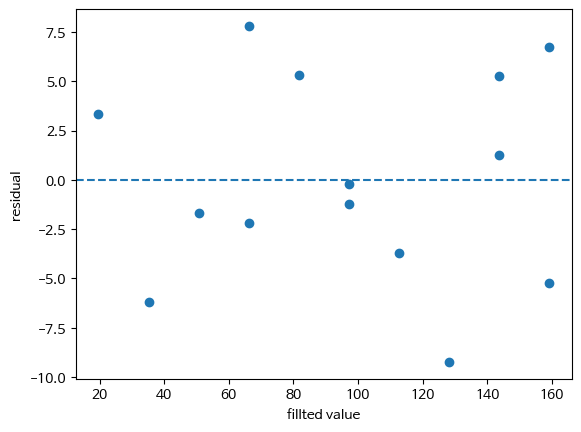

In [9]:
plt.scatter(reg_result.fittedvalues,reg_result.resid)
plt.xlabel("fillted value"); plt.ylabel("residual")
plt.axhline(y=0, linestyle="--")

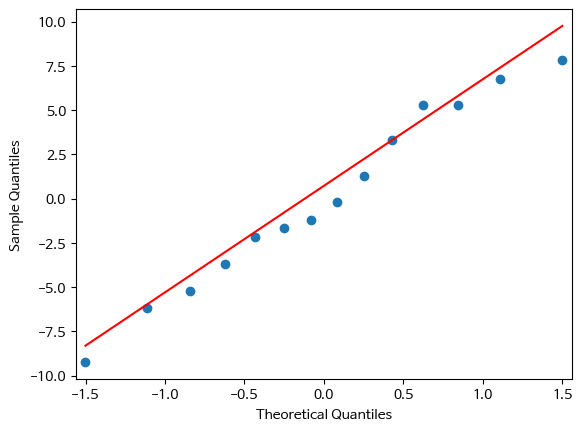

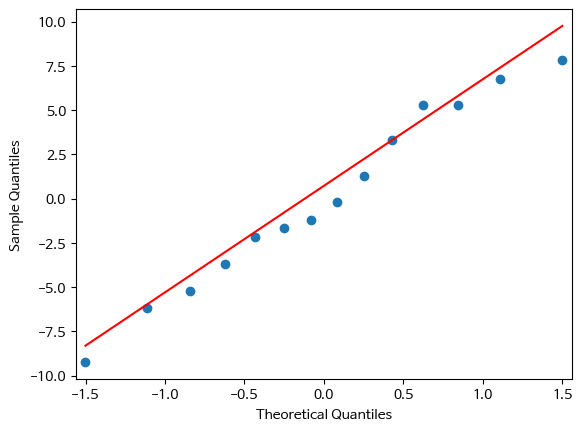

In [10]:
qqplot(reg_result.resid,line="q")

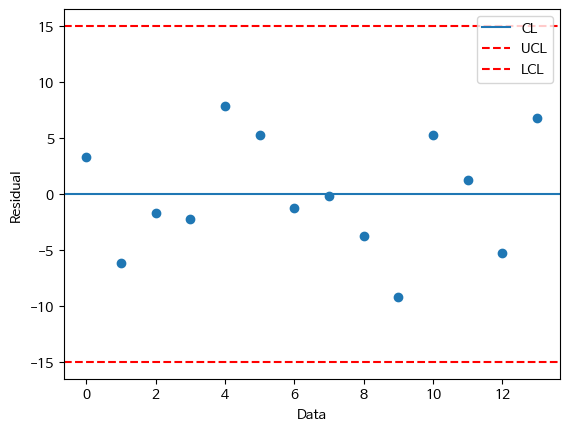

In [11]:
plt.scatter(df_raw.index, reg_result.resid, marker="o")
plt.xlabel("Data"); plt.ylabel("Residual")
plt.axhline(y=0,linestyle="-",label='CL')
plt.axhline(y=3*np.std(reg_result.resid),linestyle="--",color="red",label='UCL')
plt.axhline(y=-3*np.std(reg_result.resid),linestyle="dashed",color="red",label='LCL')
plt.legend(); plt.show()

##### 다중선형 회귀분석

In [12]:
matplotlib.rc("font",family="NanumBarunGothic")
matplotlib.rc("axes",unicode_minus=False)

In [13]:
df_raw = pd.read_csv("/home/piai/22기 최예진/230510/2. Big Data 분석/체질검사.csv",encoding='euc-kr')
df_raw.head()

FAT  AGE     WEIGHT      HEIGHT  NECK  CHEST  ABDOMEN    HIP  THIGH  KNEE  \
0  35.2   46  363.15 lb  72.25 inch  51.2  136.2    148.1  147.7   87.3  49.1   
1  11.8   27     168 lb  71.25 inch  38.1   93.0     79.1   94.5   57.3  36.2   
2  22.2   69  177.75 lb   68.5 inch  38.7  102.0     95.0   98.3   55.0  38.3   
3  10.6   57  147.75 lb  65.75 inch  35.2   99.6     86.4   90.1   53.0  35.0   
4  47.5   51     219 lb     64 inch  41.2  119.8    122.1  112.8   62.5  36.9   

   ANKLE  BICEPS  FOREARM  WRIST GENDER  
0   29.6    45.0     29.0   21.4     남성  
1   24.5    29.0     30.0   18.8     남성  
2   21.8    30.8     25.7   18.8     남성  
3   21.3    31.7     27.3   16.9     여성  
4   23.6    34.7     29.1   18.4     여성

In [14]:
df_raw.isnull().sum()

FAT        0
AGE        0
WEIGHT     0
HEIGHT     0
NECK       0
CHEST      0
ABDOMEN    0
HIP        0
THIGH      0
KNEE       0
ANKLE      0
BICEPS     0
FOREARM    0
WRIST      0
GENDER     0
dtype: int64

In [15]:
df_raw[['WEIGHT','WEIGHT_UNIT']]=df_raw['WEIGHT'].str.split(expand=True)
df_raw[['HEIGHT','HEIGHT_UNIT']]=df_raw['HEIGHT'].str.split(expand=True)
df_raw['WEIGHT']=df_raw['WEIGHT'].astype('float64')
df_raw['HEIGHT']=df_raw['HEIGHT'].astype('float64')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FAT          252 non-null    float64
 1   AGE          252 non-null    int64  
 2   WEIGHT       252 non-null    float64
 3   HEIGHT       252 non-null    float64
 4   NECK         252 non-null    float64
 5   CHEST        252 non-null    float64
 6   ABDOMEN      252 non-null    float64
 7   HIP          252 non-null    float64
 8   THIGH        252 non-null    float64
 9   KNEE         252 non-null    float64
 10  ANKLE        252 non-null    float64
 11  BICEPS       252 non-null    float64
 12  FOREARM      252 non-null    float64
 13  WRIST        252 non-null    float64
 14  GENDER       252 non-null    object 
 15  WEIGHT_UNIT  252 non-null    object 
 16  HEIGHT_UNIT  252 non-null    object 
dtypes: float64(13), int64(1), object(3)
memory usage: 33.6+ KB


In [16]:
df_raw=df_raw.drop(['WEIGHT_UNIT','HEIGHT_UNIT'],axis=1)
df_raw_dummy = pd.get_dummies(df_raw,drop_first=True)
df_raw_dummy.head()

FAT  AGE  WEIGHT  HEIGHT  NECK  CHEST  ABDOMEN    HIP  THIGH  KNEE  ANKLE  \
0  35.2   46  363.15   72.25  51.2  136.2    148.1  147.7   87.3  49.1   29.6   
1  11.8   27  168.00   71.25  38.1   93.0     79.1   94.5   57.3  36.2   24.5   
2  22.2   69  177.75   68.50  38.7  102.0     95.0   98.3   55.0  38.3   21.8   
3  10.6   57  147.75   65.75  35.2   99.6     86.4   90.1   53.0  35.0   21.3   
4  47.5   51  219.00   64.00  41.2  119.8    122.1  112.8   62.5  36.9   23.6   

   BICEPS  FOREARM  WRIST  GENDER_여성  
0    45.0     29.0   21.4          0  
1    29.0     30.0   18.8          0  
2    30.8     25.7   18.8          0  
3    31.7     27.3   16.9          1  
4    34.7     29.1   18.4          1

In [17]:
sns.pairplot(df_raw_dummy, y_vars='FAT', x_vars=['WEIGHT','NECK','CHEST','ABDOMEN'])

In [18]:
sns.pairplot(df_raw_dummy, y_vars='FsAT', x_vars=['WEIGHT','NECK','CHEST','ABDOMEN'],kind="reg")

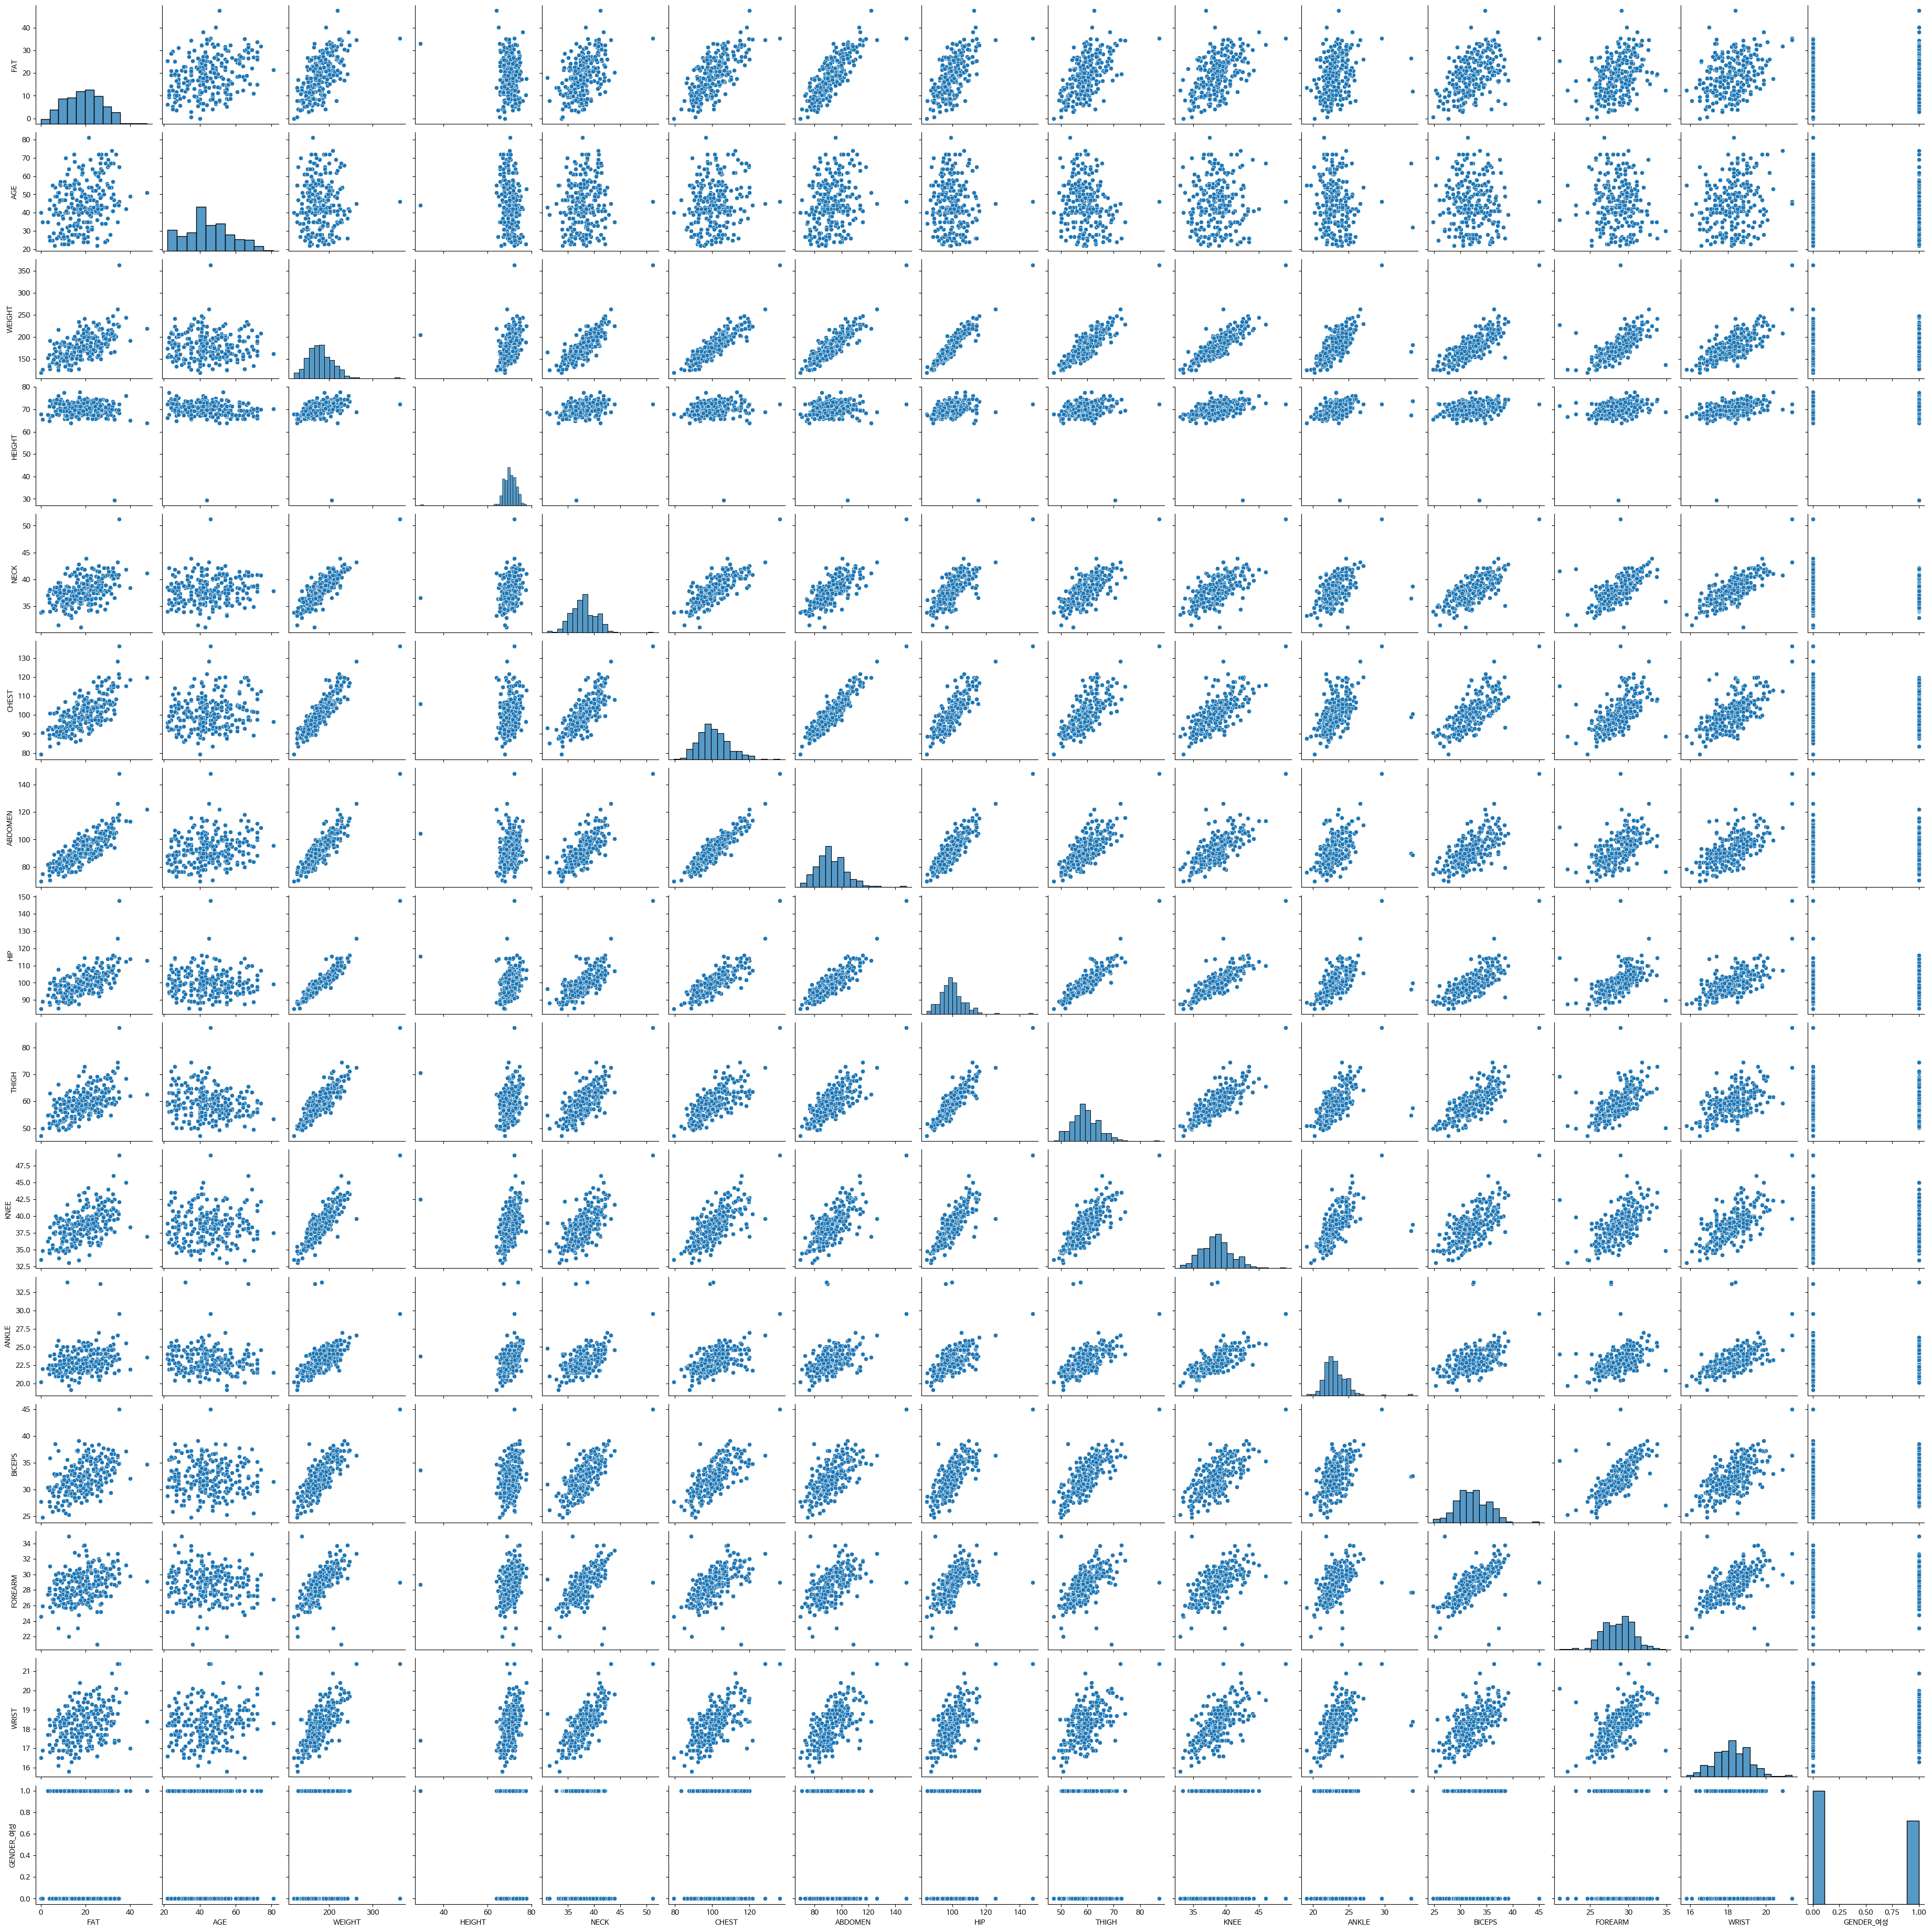

In [19]:
sns.pairplot(df_raw_dummy)

In [20]:
df_raw_dummy.corr().round(3)

FAT    AGE  WEIGHT  HEIGHT   NECK  CHEST  ABDOMEN    HIP  THIGH  \
FAT        1.000  0.291   0.612  -0.089  0.491  0.703    0.813  0.625  0.560   
AGE        0.291  1.000  -0.013  -0.172  0.114  0.176    0.230 -0.050 -0.200   
WEIGHT     0.612 -0.013   1.000   0.308  0.831  0.894    0.888  0.941  0.869   
HEIGHT    -0.089 -0.172   0.308   1.000  0.254  0.135    0.088  0.170  0.148   
NECK       0.491  0.114   0.831   0.254  1.000  0.785    0.754  0.735  0.696   
CHEST      0.703  0.176   0.894   0.135  0.785  1.000    0.916  0.829  0.730   
ABDOMEN    0.813  0.230   0.888   0.088  0.754  0.916    1.000  0.874  0.767   
HIP        0.625 -0.050   0.941   0.170  0.735  0.829    0.874  1.000  0.896   
THIGH      0.560 -0.200   0.869   0.148  0.696  0.730    0.767  0.896  1.000   
KNEE       0.509  0.018   0.853   0.286  0.672  0.719    0.737  0.823  0.799   
ANKLE      0.266 -0.105   0.614   0.265  0.478  0.483    0.453  0.558  0.540   
BICEPS     0.493 -0.041   0.800   0.208  0.731  0.728    0.685  0.739  0.761   
FOREARM    0.361 -0.085   0.630   0.229  0.624  0.580    0.503  0.545  0.567   
WRIST      0.347  0.214   0.730   0.322  0.745  0.660    0.620  0.630  0.559   
GENDER_여성 -0.033 -0.063  -0.009   0.025  0.010 -0.014   -0.017 -0.042 -0.040   

            KNEE  ANKLE  BICEPS  FOREARM  WRIST  GENDER_여성  
FAT        0.509  0.266   0.493    0.361  0.347     -0.033  
AGE        0.018 -0.105  -0.041   -0.085  0.214     -0.063  
WEIGHT     0.853  0.614   0.800    0.630  0.730     -0.009  
HEIGHT     0.286  0.265   0.208    0.229  0.322      0.025  
NECK       0.672  0.478   0.731    0.624  0.745      0.010  
CHEST      0.719  0.483   0.728    0.580  0.660     -0.014  
ABDOMEN    0.737  0.453   0.685    0.503  0.620     -0.017  
HIP        0.823  0.558   0.739    0.545  0.630     -0.042  
THIGH      0.799  0.540   0.761    0.567  0.559     -0.040  
KNEE       1.000  0.612   0.679    0.556  0.665     -0.034  
ANKLE      0.612  1.000   0.485    0.419  0.566     -0.012  
BICEPS     0.679  0.485   1.000    0.678  0.632      0.040  
FOREARM    0.556  0.419   0.678    1.000  0.586      0.045  
WRIST      0.665  0.566   0.632    0.586  1.000     -0.012  
GENDER_여성 -0.034 -0.012   0.040    0.045 -0.012      1.000

In [21]:
df_train,df_test=train_test_split(df_raw_dummy, test_size=0.3, random_state = 1234)
print("train data size:{}".format(df_train.shape))
print("test data size:{}".format(df_test.shape))

train data size:(176, 15)
test data size:(76, 15)


In [22]:
reg_model = smf.ols(formula="FAT~AGE+WEIGHT+HEIGHT+NECK+CHEST+ABDOMEN+HIP+THIGH+\
                            KNEE+ANKLE+BICEPS+FOREARM+WRIST+GENDER_여성",data=df_train)
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     38.25
Date:                Tue, 16 May 2023   Prob (F-statistic):           6.43e-44
Time:                        09:14:24   Log-Likelihood:                -495.19
No. Observations:                 176   AIC:                             1020.
Df Residuals:                     161   BIC:                             1068.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.8459     20.984     -1.708      0.0

In [23]:
df_train_x=df_train.drop('FAT',axis=1)
df_train_x_const=add_constant(df_train_x)
df_vif=pd.DataFrame()
df_vif['variable']=df_train_x_const.columns
df_vif['VIF']=[variance_inflation_factor(df_train_x_const.values,i)\
              for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF",ascending=True).round(2)

variable      VIF
14  GENDER_여성     1.04
3      HEIGHT     1.65
12    FOREARM     2.03
10      ANKLE     2.23
1         AGE     2.43
11     BICEPS     3.46
13      WRIST     3.52
4        NECK     4.29
9        KNEE     5.14
8       THIGH     9.02
5       CHEST    10.72
6     ABDOMEN    13.29
7         HIP    16.61
2      WEIGHT    37.21
0       const  4357.49

In [24]:
reg_model=smf.ols(formula="FAT~AGE+HEIGHT+NECK+CHEST+ABDOMEN+HIP+THIGH+\
                            KNEE+ANKLE+BICEPS+FOREARM+WRIST+GENDER_여성",data=df_train)
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     40.16
Date:                Tue, 16 May 2023   Prob (F-statistic):           6.67e-44
Time:                        09:14:24   Log-Likelihood:                -497.32
No. Observations:                 176   AIC:                             1023.
Df Residuals:                     162   BIC:                             1067.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1903      8.664      0.253      0.8

In [25]:
df_train_x=df_train.drop(["FAT","WEIGHT"],axis=1)
df_train_x_const=add_constant(df_train_x)
df_vif=pd.DataFrame()
df_vif['variable']=df_train_x_const.columns
df_vif['VIF']=[variance_inflation_factor(df_train_x_const.values,i)\
              for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF",ascending=True).round(2)

variable     VIF
13  GENDER_여성    1.04
2      HEIGHT    1.36
11    FOREARM    2.03
9       ANKLE    2.11
1         AGE    2.34
10     BICEPS    3.37
12      WRIST    3.42
3        NECK    3.81
8        KNEE    4.65
4       CHEST    8.81
7       THIGH    9.00
6         HIP   11.96
5     ABDOMEN   12.96
0       const  729.62

In [26]:
reg_model=smf.ols(formula="FAT~HEIGHT+NECK+ABDOMEN+HIP+FOREARM",data=df_train)
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     102.3
Date:                Tue, 16 May 2023   Prob (F-statistic):           2.18e-49
Time:                        09:14:24   Log-Likelihood:                -501.89
No. Observations:                 176   AIC:                             1016.
Df Residuals:                     170   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7817      7.302      0.381      0.7

In [27]:
df_train_x=df_train[["HEIGHT","NECK","ABDOMEN","HIP","FOREARM"]]
df_train_x_const=add_constant(df_train_x)
df_vif=pd.DataFrame()
df_vif['variable']=df_train_x_const.columns
df_vif['VIF']=[variance_inflation_factor(df_train_x_const.values,i) for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF",inplace=True)
df_vif.round(2)

variable     VIF
1   HEIGHT    1.14
5  FOREARM    1.57
2     NECK    2.87
3  ABDOMEN    4.91
4      HIP    4.95
0    const  516.31

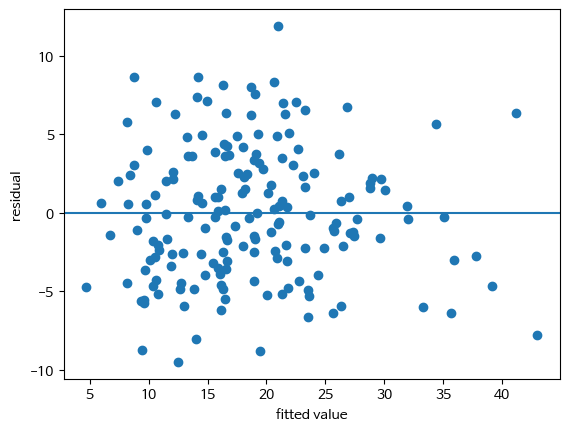

In [28]:
plt.scatter(reg_result.fittedvalues,reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y=0,linestyle="-")

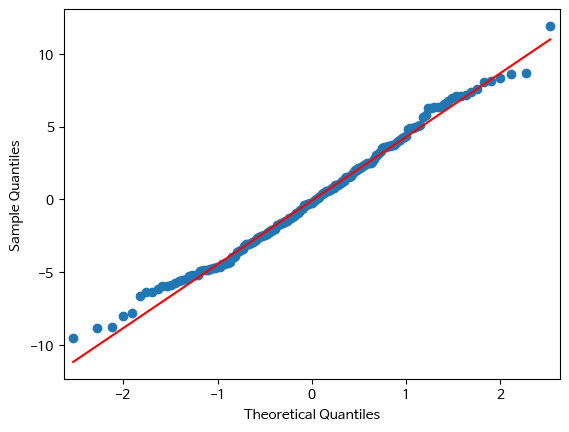

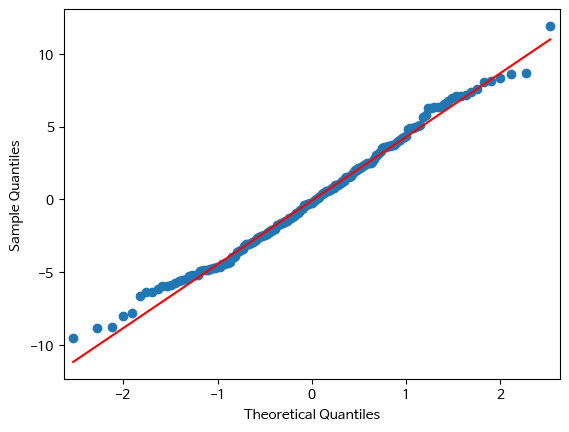

In [29]:
qqplot(reg_result.resid,line='q')

In [30]:
plt.scatter(df_train.index, reg_result.resid)
plt.xlabel("Data"); plt.ylabel("Residual")
plt.axhline(y=0,linestyle="-",label='CL')
plt.axhline(y=3*np.std(reg_result.resid),linestyle="--",color="red",label='UCL')
plt.axhline(y=-3*np.std(reg_result.resid),linestyle="dashed",color="red",label='LCL')
plt.legend()

In [31]:
train_pred=reg_result.predict(df_train)
test_pred=reg_result.predict(df_test)
print("train data의 결정계수:",r2_score(df_train['FAT'],train_pred))
print("test data의 결정계수:",r2_score(df_test['FAT'],test_pred))

train data의 결정계수: 0.7505481797941164
test data의 결정계수: 0.6575253938890124


In [32]:
df_train_y=df_train['FAT']
df_train_x=df_train.drop('FAT',axis=1)
model=LinearRegression()
rfe=RFE(estimator=model, n_features_to_select=5).fit(df_train_x,df_train_y)
selected_cols=df_train_x.columns[rfe.support_]
removed_cols=df_train_x.columns[~rfe.support_]
print("Selected Variables:{}".format(selected_cols))
print("Removed Variables:{}".format(removed_cols))

Selected Variables:Index(['NECK', 'ABDOMEN', 'ANKLE', 'FOREARM', 'WRIST'], dtype='object')
Removed Variables:Index(['AGE', 'WEIGHT', 'HEIGHT', 'CHEST', 'HIP', 'THIGH', 'KNEE', 'BICEPS',
       'GENDER_여성'],
      dtype='object')


In [33]:
rfe_reg_model=smf.ols(formula="FAT~NECK+ABDOMEN+ANKLE+FOREARM+WRIST",data=df_train)
rfe_reg_result=rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     89.26
Date:                Tue, 16 May 2023   Prob (F-statistic):           1.07e-45
Time:                        09:14:25   Log-Likelihood:                -510.73
No. Observations:                 176   AIC:                             1033.
Df Residuals:                     170   BIC:                             1052.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.3447      6.993     -1.336      0.1

##### 실습

In [34]:
matplotlib.rc("font",family="NanumBarunGothic")
matplotlib.rc("axes",unicode_minus=False)

In [35]:
# 데이터 구성하기
df_raw = pd.read_csv("/home/piai/22기 최예진/230510/2. Big Data 분석/DIABETES.csv",encoding='euc-kr')
df_raw.head()

Y  AGE  GENDER   BMI     BP  CHOLESTEROL    LDL   HDL  TCH     LTG  \
0  151   59       2  32.1  101.0          157   93.2  38.0  4.0  4.8598   
1   75   48       1  21.6   87.0          183  103.2  70.0  3.0  3.8918   
2  141   72       2  30.5   93.0          156   93.6  41.0  4.0  4.6728   
3  206   24       1  25.3   84.0          198  131.4  40.0  5.0  4.8903   
4  135   50       1  23.0  101.0          192  125.4  52.0  4.0  4.2905   

   GLUCOSE  
0       87  
1       69  
2       85  
3       89  
4       80

In [36]:
# 2를 0으로 대체하라
df_raw['GENDER']=df_raw['GENDER'].replace(2,0)
df_raw.head()

Y  AGE  GENDER   BMI     BP  CHOLESTEROL    LDL   HDL  TCH     LTG  \
0  151   59       0  32.1  101.0          157   93.2  38.0  4.0  4.8598   
1   75   48       1  21.6   87.0          183  103.2  70.0  3.0  3.8918   
2  141   72       0  30.5   93.0          156   93.6  41.0  4.0  4.6728   
3  206   24       1  25.3   84.0          198  131.4  40.0  5.0  4.8903   
4  135   50       1  23.0  101.0          192  125.4  52.0  4.0  4.2905   

   GLUCOSE  
0       87  
1       69  
2       85  
3       89  
4       80

In [37]:
df_raw.isnull().sum()

Y              0
AGE            0
GENDER         0
BMI            0
BP             0
CHOLESTEROL    0
LDL            0
HDL            0
TCH            0
LTG            0
GLUCOSE        0
dtype: int64

In [38]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Y            442 non-null    int64  
 1   AGE          442 non-null    int64  
 2   GENDER       442 non-null    int64  
 3   BMI          442 non-null    float64
 4   BP           442 non-null    float64
 5   CHOLESTEROL  442 non-null    int64  
 6   LDL          442 non-null    float64
 7   HDL          442 non-null    float64
 8   TCH          442 non-null    float64
 9   LTG          442 non-null    float64
 10  GLUCOSE      442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [39]:
df_raw_dummy = pd.get_dummies(df_raw,drop_first=True)
df_raw_dummy.head()

Y  AGE  GENDER   BMI     BP  CHOLESTEROL    LDL   HDL  TCH     LTG  \
0  151   59       0  32.1  101.0          157   93.2  38.0  4.0  4.8598   
1   75   48       1  21.6   87.0          183  103.2  70.0  3.0  3.8918   
2  141   72       0  30.5   93.0          156   93.6  41.0  4.0  4.6728   
3  206   24       1  25.3   84.0          198  131.4  40.0  5.0  4.8903   
4  135   50       1  23.0  101.0          192  125.4  52.0  4.0  4.2905   

   GLUCOSE  
0       87  
1       69  
2       85  
3       89  
4       80

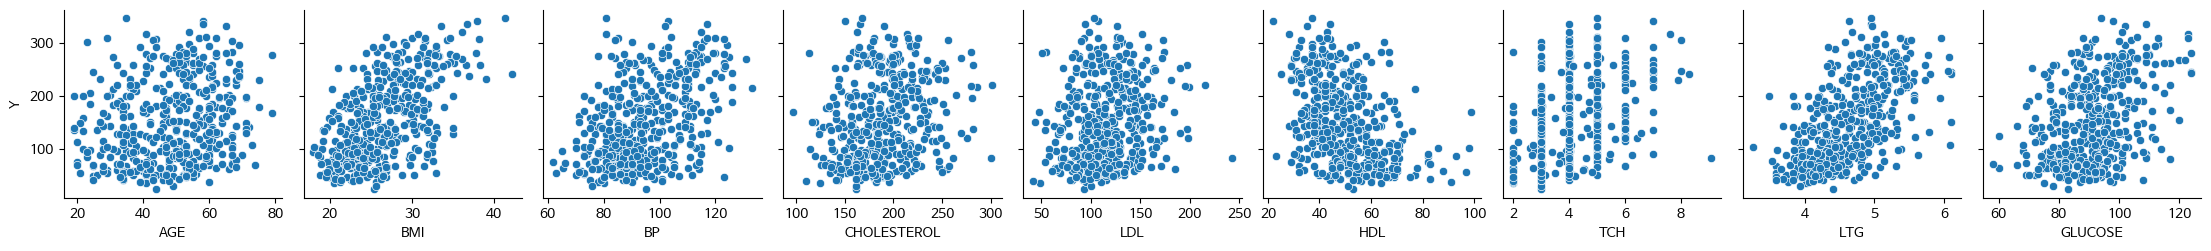

In [40]:
sns.pairplot(df_raw_dummy, y_vars='Y', x_vars=['AGE','BMI','BP','CHOLESTEROL','LDL','HDL','TCH','LTG','GLUCOSE'])

In [41]:
sns.pairplot(df_raw_dummy)

In [42]:
# 상관관계 분석
df_raw_dummy.corr().round(3)

Y    AGE  GENDER    BMI     BP  CHOLESTEROL    LDL    HDL  \
Y            1.000  0.188  -0.043  0.586  0.441        0.212  0.174 -0.395   
AGE          0.188  1.000  -0.174  0.185  0.335        0.260  0.219 -0.075   
GENDER      -0.043 -0.174   1.000 -0.088 -0.241       -0.035 -0.143  0.379   
BMI          0.586  0.185  -0.088  1.000  0.395        0.250  0.261 -0.367   
BP           0.441  0.335  -0.241  0.395  1.000        0.242  0.186 -0.179   
CHOLESTEROL  0.212  0.260  -0.035  0.250  0.242        1.000  0.897  0.052   
LDL          0.174  0.219  -0.143  0.261  0.186        0.897  1.000 -0.196   
HDL         -0.395 -0.075   0.379 -0.367 -0.179        0.052 -0.196  1.000   
TCH          0.430  0.204  -0.332  0.414  0.258        0.542  0.660 -0.738   
LTG          0.566  0.271  -0.150  0.446  0.393        0.516  0.318 -0.399   
GLUCOSE      0.382  0.302  -0.208  0.389  0.390        0.326  0.291 -0.274   

               TCH    LTG  GLUCOSE  
Y            0.430  0.566    0.382  
AGE          0.204  0.271    0.302  
GENDER      -0.332 -0.150   -0.208  
BMI          0.414  0.446    0.389  
BP           0.258  0.393    0.390  
CHOLESTEROL  0.542  0.516    0.326  
LDL          0.660  0.318    0.291  
HDL         -0.738 -0.399   -0.274  
TCH          1.000  0.618    0.417  
LTG          0.618  1.000    0.465  
GLUCOSE      0.417  0.465    1.000

In [43]:
df_train,df_test=train_test_split(df_raw_dummy, test_size=0.3, random_state = 100)
print("train data size:{}".format(df_train.shape))
print("test data size:{}".format(df_test.shape))

train data size:(309, 11)
test data size:(133, 11)


In [44]:
reg_model = smf.ols(formula="Y~AGE+GENDER+BMI+BP+CHOLESTEROL+LDL+HDL+TCH+LTG+GLUCOSE",data=df_train)
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     32.01
Date:                Tue, 16 May 2023   Prob (F-statistic):           9.91e-42
Time:                        09:15:01   Log-Likelihood:                -1673.8
No. Observations:                 309   AIC:                             3370.
Df Residuals:                     298   BIC:                             3411.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -426.0526     80.627     -5.284      

In [45]:
# 설명변수간의 다중공선성 확인
df_train_x=df_train.drop('Y',axis=1)

df_train_x_const=add_constant(df_train_x)
# DataFrame으로 저장
df_vif=pd.DataFrame()
df_vif['variable']=df_train_x_const.columns
df_vif['VIF']=[variance_inflation_factor(df_train_x_const.values,i)\
              for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF",ascending=True).round(2)

variable     VIF
1           AGE    1.25
2        GENDER    1.28
4            BP    1.36
3           BMI    1.46
10      GLUCOSE    1.47
8           TCH    8.39
9           LTG   10.87
7           HDL   14.81
6           LDL   37.68
5   CHOLESTEROL   55.44
0         const  652.60

In [46]:
#CHOLESTEROL 제거
reg_model = smf.ols(formula="Y~AGE+GENDER+BMI+BP+LDL+HDL+TCH+LTG+GLUCOSE",data=df_train)
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     34.83
Date:                Tue, 16 May 2023   Prob (F-statistic):           1.02e-41
Time:                        09:15:01   Log-Likelihood:                -1675.8
No. Observations:                 309   AIC:                             3372.
Df Residuals:                     299   BIC:                             3409.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -296.9904     45.996     -6.457      0.0

In [47]:
df_train_x=df_train.drop(['Y','CHOLESTEROL'],axis=1)
df_train_x_const=add_constant(df_train_x)
df_vif=pd.DataFrame()
df_vif['variable']=df_train_x_const.columns
df_vif['VIF']=[variance_inflation_factor(df_train_x_const.values,i)\
              for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF",ascending=True).round(2)

variable     VIF
1      AGE    1.25
2   GENDER    1.27
4       BP    1.36
3      BMI    1.44
9  GLUCOSE    1.45
8      LTG    2.11
5      LDL    2.94
6      HDL    3.78
7      TCH    7.71
0    const  210.43

In [48]:
#TCH 제거
reg_model = smf.ols(formula="Y~AGE+GENDER+BMI+BP+LDL+HDL+LTG+GLUCOSE",data=df_train)
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     39.30
Date:                Tue, 16 May 2023   Prob (F-statistic):           1.58e-42
Time:                        09:15:01   Log-Likelihood:                -1675.8
No. Observations:                 309   AIC:                             3370.
Df Residuals:                     300   BIC:                             3403.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -294.8656     43.787     -6.734      0.0

In [49]:
df_train_x=df_train.drop(['Y','CHOLESTEROL','TCH'],axis=1)
df_train_x_const=add_constant(df_train_x)
df_vif=pd.DataFrame()
df_vif['variable']=df_train_x_const.columns
df_vif['VIF']=[variance_inflation_factor(df_train_x_const.values,i)\
              for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF",ascending=True).round(2)

variable     VIF
5      LDL    1.20
1      AGE    1.25
2   GENDER    1.26
4       BP    1.34
3      BMI    1.43
8  GLUCOSE    1.45
6      HDL    1.49
7      LTG    1.62
0    const  191.32

In [50]:
#TCH 제거
reg_model = smf.ols(formula="Y~GENDER+BMI+BP+LDL+HDL+LTG+GLUCOSE",data=df_train)
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     45.04
Date:                Tue, 16 May 2023   Prob (F-statistic):           2.40e-43
Time:                        09:15:01   Log-Likelihood:                -1675.8
No. Observations:                 309   AIC:                             3368.
Df Residuals:                     301   BIC:                             3398.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -293.4986     43.537     -6.741      0.0

In [51]:
df_train_x=df_train.drop(['Y','CHOLESTEROL','TCH','AGE'],axis=1)
df_train_x_const=add_constant(df_train_x)
df_vif=pd.DataFrame()
df_vif['variable']=df_train_x_const.columns
df_vif['VIF']=[variance_inflation_factor(df_train_x_const.values,i)\
              for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF",ascending=True).round(2)

variable     VIF
4      LDL    1.17
1   GENDER    1.25
3       BP    1.29
7  GLUCOSE    1.42
2      BMI    1.43
5      HDL    1.47
6      LTG    1.60
0    const  189.71

In [52]:
plt.scatter(reg_result.fittedvalues,reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y=0,linestyle="-")

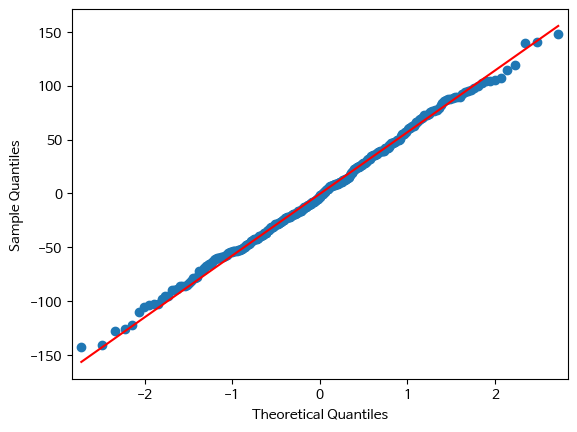

In [53]:
qqplot(reg_result.resid,line="q")

In [54]:
plt.scatter(df_train.index, reg_result.resid)
plt.xlabel("Data"); plt.ylabel("Residual")
plt.axhline(y=0,linestyle="-",label='CL')
plt.axhline(y=3*np.std(reg_result.resid),linestyle="--",color="red",label='UCL')
plt.axhline(y=-3*np.std(reg_result.resid),linestyle="dashed",color="red",label='LCL')
plt.legend()

In [55]:
train_pred=reg_result.predict(df_train)
test_pred=reg_result.predict(df_test)
print("train data의 결정계수:",r2_score(df_train['Y'],train_pred))
print("test data의 결정계수:",r2_score(df_test['Y'],test_pred))

train data의 결정계수: 0.511559679020299
test data의 결정계수: 0.4947786231830277


In [56]:
df_train_y=df_train['Y']
df_train_x=df_train.drop('Y',axis=1)
model=LinearRegression()
rfe=RFE(estimator=model, n_features_to_select=5).fit(df_train_x,df_train_y)
selected_cols=df_train_x.columns[rfe.support_]
removed_cols=df_train_x.columns[~rfe.support_]
print("Selected Variables:{}".format(selected_cols))
print("Removed Variables:{}".format(removed_cols))

Selected Variables:Index(['GENDER', 'BMI', 'BP', 'TCH', 'LTG'], dtype='object')
Removed Variables:Index(['AGE', 'CHOLESTEROL', 'LDL', 'HDL', 'GLUCOSE'], dtype='object')


In [57]:
rfe_reg_model=smf.ols(formula="Y~GENDER+BMI+BP+TCH+LTG",data=df_train)
rfe_reg_result=rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     57.97
Date:                Tue, 16 May 2023   Prob (F-statistic):           3.38e-42
Time:                        09:15:02   Log-Likelihood:                -1682.8
No. Observations:                 309   AIC:                             3378.
Df Residuals:                     303   BIC:                             3400.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -364.5326     33.944    -10.739      0.0

In [59]:
df_reg_coef=pd.DataFrame({"Coef":reg_result.params.values[1:]},
                        index=['LDL','GENDER','BP','BMI','GLUCOSE','HDL','LTG'])
df_reg_coef.plot.barh(y='Coef')

<Axes: >